In [1]:
# Load CSV using Pandas from URL
import pandas
url = "https://aisgaiap.blob.core.windows.net/aiap6-assessment-data/scooter_rental_data.csv"

data = pandas.read_csv(url)

In [2]:
#Importing Required Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
data.head()

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users
0,2011-01-01,0,clear,66.7,95.0,81.0,0.0,3,21,164
1,2011-01-01,1,clear,65.0,93.2,80.0,0.0,35,54,417
2,2011-01-01,2,clear,65.0,93.2,80.0,0.0,38,35,356
3,2011-01-01,3,clear,66.7,95.0,75.0,0.0,35,19,129
4,2011-01-01,4,clear,66.7,95.0,75.0,0.0,11,-2,10


In [4]:
#Performing Exploratory Data Analysis

data.shape

(17958, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17958 entries, 0 to 17957
Data columns (total 10 columns):
date                      17958 non-null object
hr                        17958 non-null int64
weather                   17958 non-null object
temperature               17958 non-null float64
feels-like-temperature    17958 non-null float64
relative-humidity         17958 non-null float64
windspeed                 17958 non-null float64
psi                       17958 non-null int64
guest-users               17958 non-null int64
registered-users          17958 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 1.4+ MB


Inference :
There are 8 Numerical columns in the dataset out of 
that 4 columns have decimal values (float64).

There are 2 Categorical columns in the dataset.

In [7]:
data.isnull().sum()

date                      0
hr                        0
weather                   0
temperature               0
feels-like-temperature    0
relative-humidity         0
windspeed                 0
psi                       0
guest-users               0
registered-users          0
dtype: int64

There is no null values in the dataset.

In [8]:
data.count()

date                      17958
hr                        17958
weather                   17958
temperature               17958
feels-like-temperature    17958
relative-humidity         17958
windspeed                 17958
psi                       17958
guest-users               17958
registered-users          17958
dtype: int64

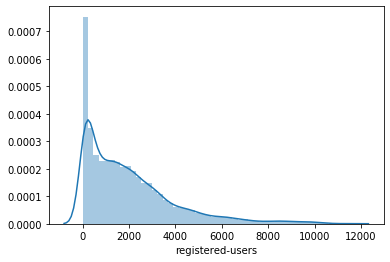

In [9]:
sns.distplot(data['registered-users'])

In [10]:
print("Skewness:",data['registered-users'].skew())
print("Kurtosis:",data['registered-users'].kurt())

Skewness: 1.5563955194650816
Kurtosis: 2.7474382050600337


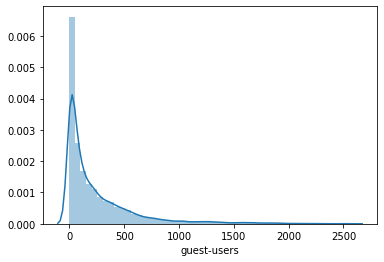

In [11]:
sns.distplot(data['guest-users'])

In [12]:
print("Skewness:",data['guest-users'].skew())
print("Kurtosis:",data['guest-users'].kurt())

Skewness: 2.4979553906243073
Kurtosis: 7.568668315043792


In [6]:
%matplotlib inline
temp= pd.DatetimeIndex(data['date'])
data["dayofweek"] = temp.dayofweek
data["hour"] = temp.hour
data["month"] = temp.month
data['year']= temp.year
data = data.drop(['date'],axis=1)
data.head()

,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users,dayofweek,hour,month,year
0,0,clear,66.7,95.0,81.0,0.0,3,21,164,5,0,1,2011
1,1,clear,65.0,93.2,80.0,0.0,35,54,417,5,0,1,2011
2,2,clear,65.0,93.2,80.0,0.0,38,35,356,5,0,1,2011
3,3,clear,66.7,95.0,75.0,0.0,35,19,129,5,0,1,2011
4,4,clear,66.7,95.0,75.0,0.0,11,-2,10,5,0,1,2011


In [14]:
data.describe()

,hr,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users,dayofweek,hour,month,year
count,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.0,17958.000000,17958.000000
mean,11.533578,88.457512,117.332008,62.758993,12.733155,24.557300,249.740394,1998.910346,3.013142,0.0,6.539370,2011.502450
std,6.915319,16.285017,20.416251,19.266532,8.213750,14.451091,344.815252,1966.561546,2.002378,0.0,3.438184,0.500008
min,0.000000,48.100000,60.800000,0.000000,0.000000,0.000000,-2.000000,-5.000000,0.000000,0.0,1.000000,2011.000000
25%,6.000000,75.200000,100.400000,48.000000,7.000000,12.000000,27.000000,441.000000,1.000000,0.0,4.000000,2011.000000
50%,12.000000,88.700000,118.400000,63.000000,13.000000,24.000000,117.000000,1504.000000,3.000000,0.0,7.000000,2012.000000
75%,18.000000,102.200000,134.600000,78.000000,17.000000,37.000000,338.000000,2860.000000,5.000000,0.0,10.000000,2012.000000
max,23.000000,131.000000,179.600000,100.000000,57.000000,49.000000,2567.000000,11519.000000,6.000000,0.0,12.000000,2012.000000


The mean and median of all the columns will provide information regarding the skewness.

when : 
mean > median the data is right skewed which indicates most of the values are at right side 
and outliers might present at the left side on the normal distribution curve. 
mean < median vice versa.

In this case, there is no big variation in the mean and median. 
Outliers have to be analysed.

Correlation Plot

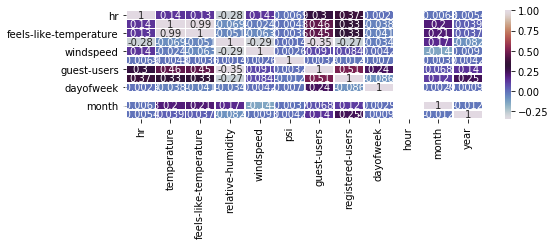

In [15]:
corr = data.corr()
plt.figure(figsize=(8,2))
sns.heatmap(corr,annot=True,linewidths=0.5,cmap='twilight')
plt.show()

From correlation plot, hour, temperature, feels like temperature, are positively correlated with output variable guest-users and registered-users. 
However, these features are not quite strongly correlated.

Visualizing the Numerical Categories

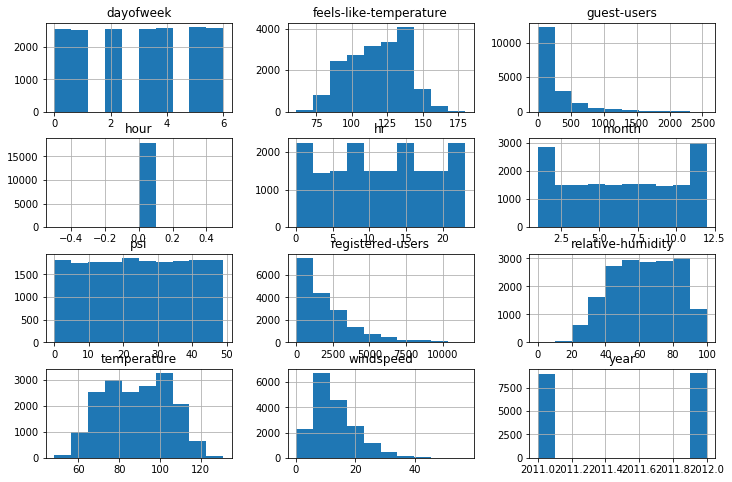

In [16]:
data.hist(figsize=(12,8))
plt.show()

Observing from all the numerical categories and the values range in the histogram plot.

In feels-like-temperature column, the minimum value is around 75 and maximum value is 130 and have good distribution in 100-125. 

In guest-users, registered-users and windspeed column, the minimum value is around 2250 and the maximum value is from 0-250, 
the minimum value is 10,000 and the maximum value is from 0-1250,
the minimum value is 40 and the maximum value is 10 respectively.

In hr column, the minimum value is around 2250, the maximum value is from 0-250.

In psi, temperature column, relative humidity the data is well distributed throughout the range.

Outlier Detection Applying Scatter Plot for numerical variables

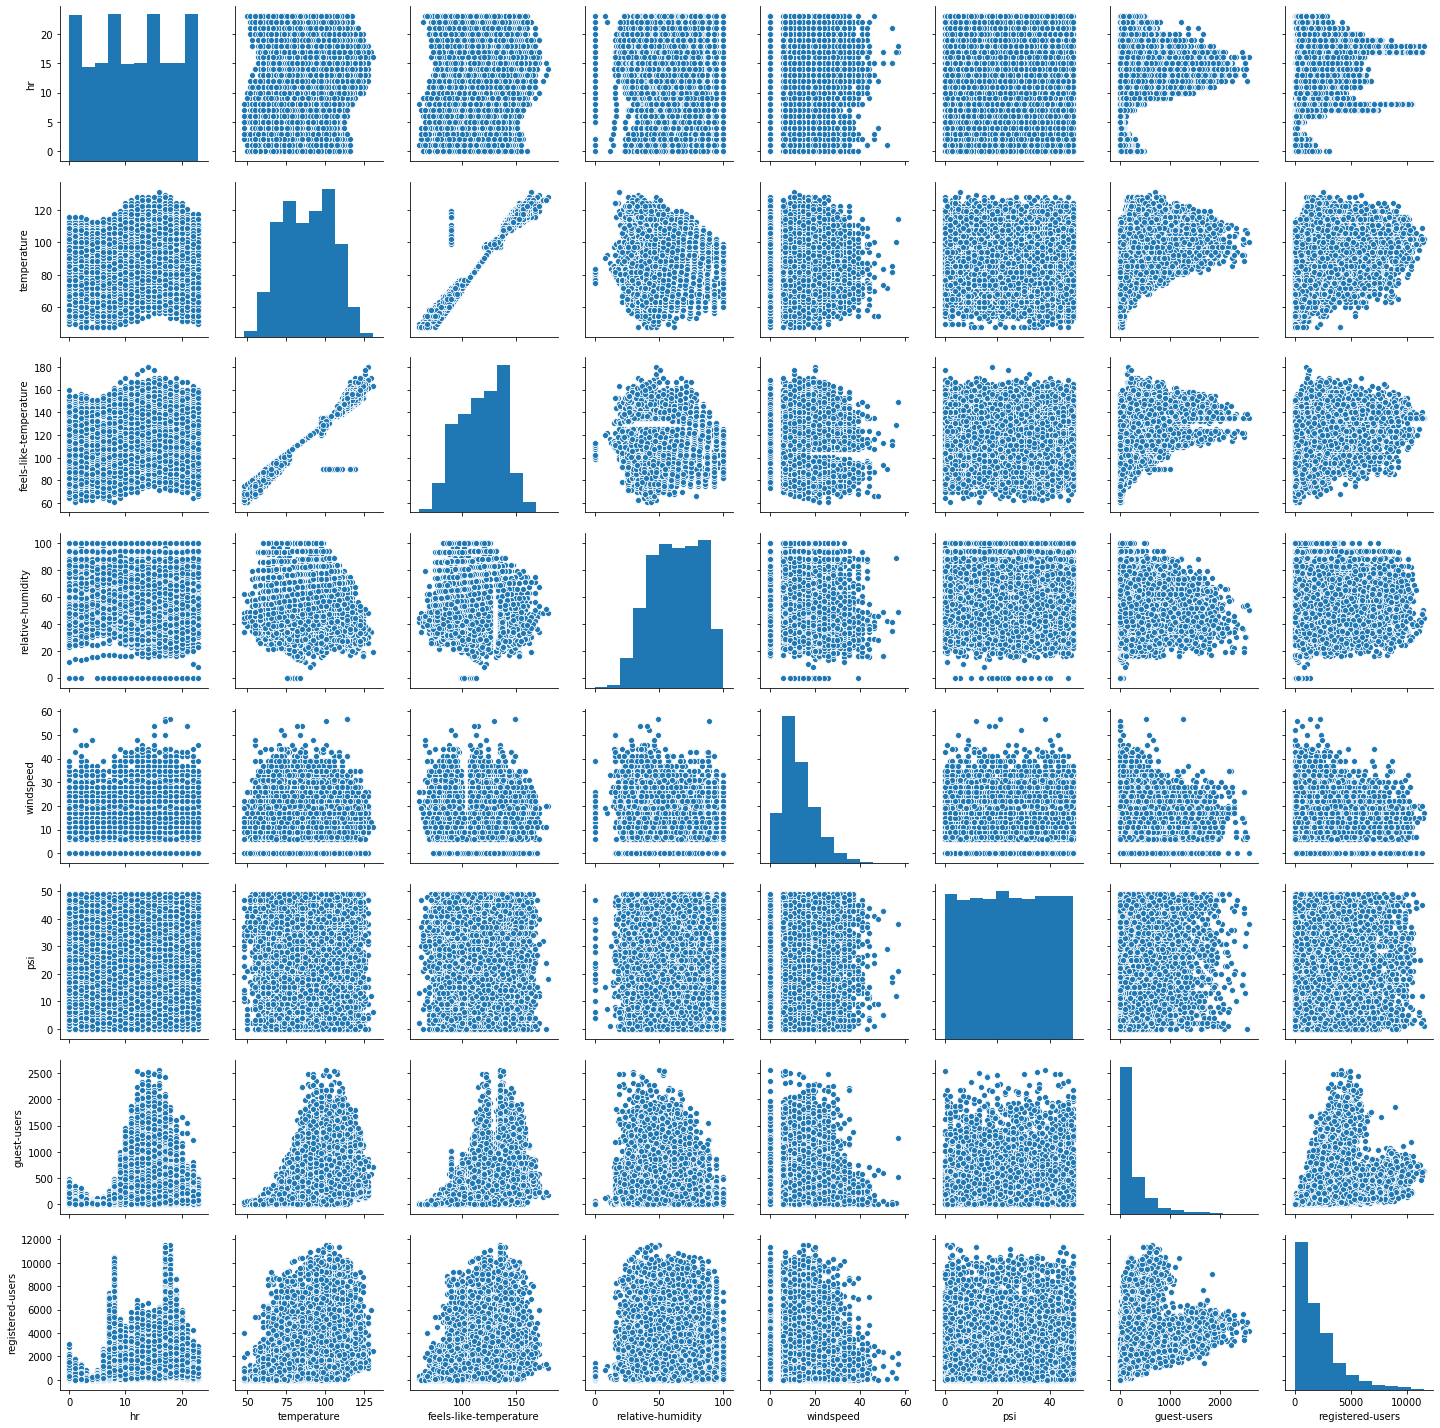

In [17]:
cols =['hr','temperature','feels-like-temperature','relative-humidity','windspeed','psi','guest-users','registered-users']
sns.pairplot(data[cols])
plt.show()

The guest-users are most likely to rent the e-scooter in the evening which the peak value is at 15.00 which probably when the weather is not too hot to go out with e-scooter.

The registered-users are most likely to rent the e-scooter both in the morning (7am) and in the evening at 15.00 which probably when the weather is not too hot to go out with e-scooter.

The guest-users are most likely to rent the e-scooter when the temperature and feel-like-temperature are around 100F.

The guest-users are most likely to rent the e-scooter when the relative-humidity is low around 20-60.

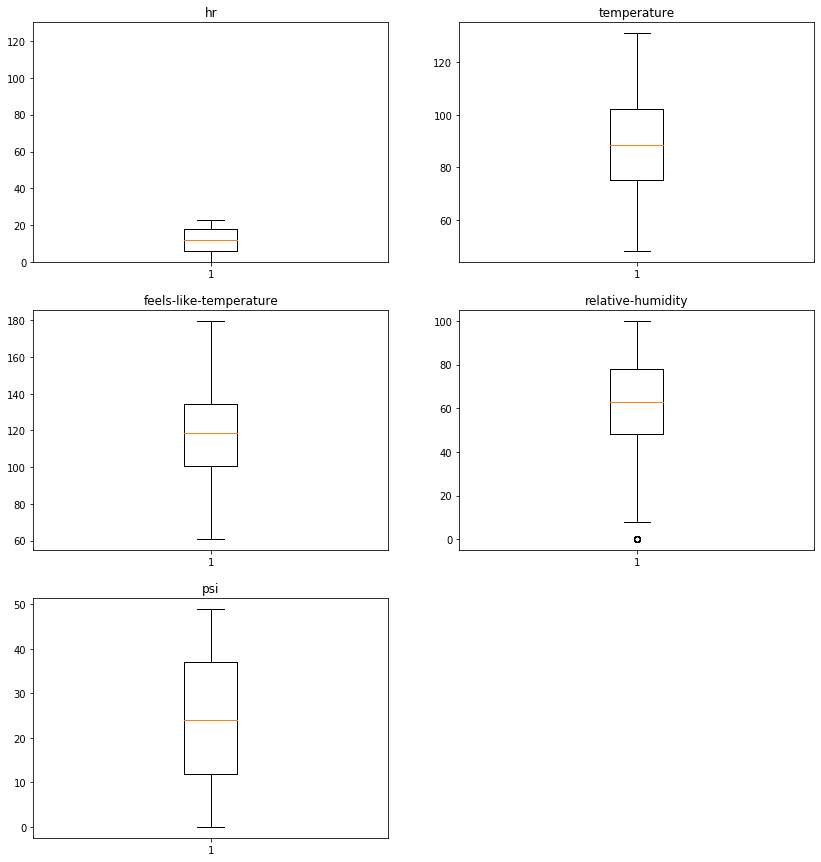

In [18]:
#Applying box plot for all the numeric values

plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(data['hr'])
plt.ylim(0,130)
plt.title('hr')

plt.subplot(3,2,2)
plt.boxplot(data['temperature'])
plt.title('temperature')

plt.subplot(3,2,3)
plt.boxplot(data['feels-like-temperature'])
plt.title('feels-like-temperature')

plt.subplot(3,2,4)
plt.boxplot(data['relative-humidity'])
plt.title('relative-humidity')

plt.subplot(3,2,5)
plt.boxplot(data['psi'])
plt.title('psi')

plt.show()

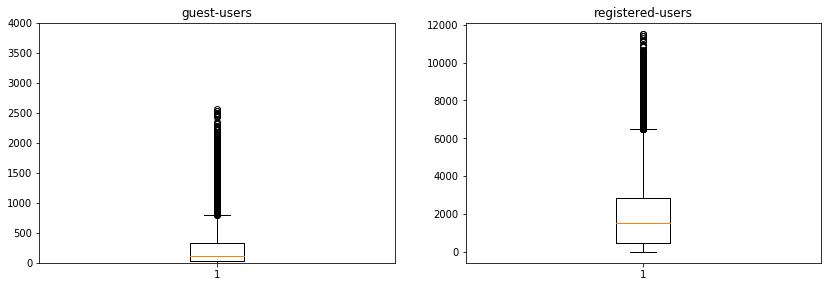

In [19]:
plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(data['guest-users'])
plt.ylim(0,4000)
plt.title('guest-users')

plt.subplot(3,2,2)
plt.boxplot(data['registered-users'])
plt.title('registered-users')

plt.show()

In [7]:
pnames = ["relative-humidity","guest-users","registered-users"]

#Detect & Delete Outliers
for i in pnames :
    print (i)
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    
    data = data.drop(data[data.loc[:,i] < min].index)
    data = data.drop(data[data.loc[:,i] > max].index)

relative-humidity
3.0
123.0
guest-users
-440.625
806.375
registered-users
-2900.375
5866.625


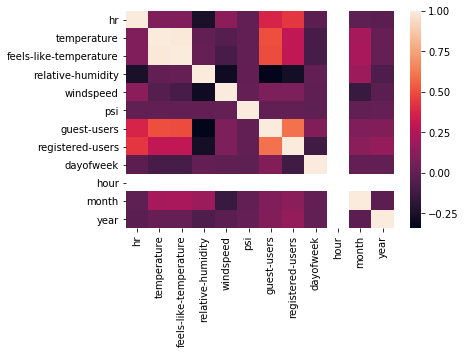

In [8]:
corrmat = data.corr()
sns.heatmap(corrmat)

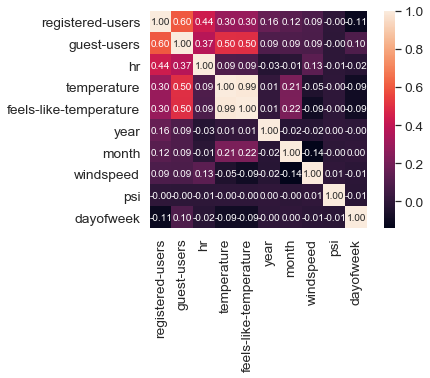

In [9]:
k =10
cols = corrmat.nlargest(k,'registered-users')['registered-users'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,square=True,annot=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

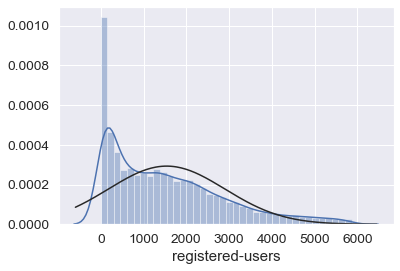

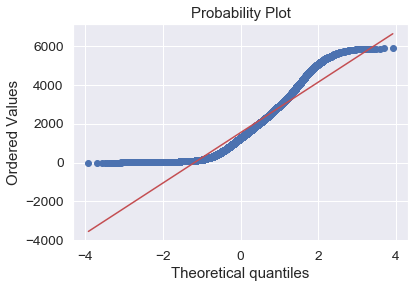

In [10]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats


sns.distplot(data['registered-users'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['registered-users'], plot=plt)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import pylab
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler

In [12]:
stdscale = StandardScaler()

In [13]:
le =LabelEncoder()

In [14]:
weather = le.fit_transform(data['weather'])

In [15]:
{index: label for index , label in enumerate(le.classes_)}

{0: 'CLEAR',
 1: 'CLOUDY',
 2: 'LIGHT SNOW/RAIN',
 3: 'clear',
 4: 'cloudy',
 5: 'heavy snow/rain',
 6: 'lear',
 7: 'light snow/rain',
 8: 'loudy'}

In [16]:
data['weather'] = le.fit_transform(data['weather'])

In [17]:
data.head()

,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users,dayofweek,hour,month,year
0,0,3,66.7,95.0,81.0,0.0,3,21,164,5,0,1,2011
1,1,3,65.0,93.2,80.0,0.0,35,54,417,5,0,1,2011
2,2,3,65.0,93.2,80.0,0.0,38,35,356,5,0,1,2011
3,3,3,66.7,95.0,75.0,0.0,35,19,129,5,0,1,2011
4,4,3,66.7,95.0,75.0,0.0,11,-2,10,5,0,1,2011


In [18]:
stdscalar = StandardScaler()

In [19]:
data_stdscalar = stdscalar.fit_transform(data)

In [20]:
data_stdscalar = pd.DataFrame(data_stdscalar,columns=data.columns)

In [21]:
data_stdscalar.head()

,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users,dayofweek,hour,month,year
0,-1.558240,-0.48016,-1.254806,-1.006670,0.882011,-1.521933,-1.494573,-0.773154,-1.009149,1.045479,0.0,-1.550992,-0.951398
1,-1.418459,-0.48016,-1.360385,-1.095397,0.829346,-1.521933,0.718044,-0.595092,-0.823470,1.045479,0.0,-1.550992,-0.951398
2,-1.278679,-0.48016,-1.360385,-1.095397,0.829346,-1.521933,0.925477,-0.697612,-0.868238,1.045479,0.0,-1.550992,-0.951398
3,-1.138899,-0.48016,-1.254806,-1.006670,0.566020,-1.521933,0.718044,-0.783945,-1.034836,1.045479,0.0,-1.550992,-0.951398
4,-0.999118,-0.48016,-1.254806,-1.006670,0.566020,-1.521933,-0.941419,-0.897258,-1.122171,1.045479,0.0,-1.550992,-0.951398


In [22]:
MinMax = MinMaxScaler()

In [23]:
data_MinMax = MinMax.fit_transform(data)

In [24]:
data_MinMax = pd.DataFrame(data_MinMax,columns=data.columns)

In [25]:
data_MinMax.head()

,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users,dayofweek,hour,month,year
0,0.000000,0.375,0.224367,0.287879,0.793478,0.0,0.061224,0.028465,0.028786,0.833333,0.0,0.0,0.0
1,0.043478,0.375,0.203860,0.272727,0.782609,0.0,0.714286,0.069307,0.071879,0.833333,0.0,0.0,0.0
2,0.086957,0.375,0.203860,0.272727,0.782609,0.0,0.775510,0.045792,0.061489,0.833333,0.0,0.0,0.0
3,0.130435,0.375,0.224367,0.287879,0.728261,0.0,0.714286,0.025990,0.022824,0.833333,0.0,0.0,0.0
4,0.173913,0.375,0.224367,0.287879,0.728261,0.0,0.224490,0.000000,0.002555,0.833333,0.0,0.0,0.0


In [26]:
Robust = RobustScaler()

In [27]:
data_Robust = Robust.fit_transform(data)

In [28]:
data_Robust = pd.DataFrame(data_Robust,columns=data.columns)

In [29]:
data_Robust.head()

,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users,dayofweek,hour,month,year
0,-0.846154,0.0,-0.688889,-0.578947,0.50000,-1.1,-0.88,-0.280172,-0.553084,0.5,0.0,-0.714286,0.0
1,-0.769231,0.0,-0.751852,-0.631579,0.46875,-1.1,0.40,-0.137931,-0.425177,0.5,0.0,-0.714286,0.0
2,-0.692308,0.0,-0.751852,-0.631579,0.46875,-1.1,0.52,-0.219828,-0.456016,0.5,0.0,-0.714286,0.0
3,-0.615385,0.0,-0.688889,-0.578947,0.31250,-1.1,0.40,-0.288793,-0.570779,0.5,0.0,-0.714286,0.0
4,-0.538462,0.0,-0.688889,-0.578947,0.31250,-1.1,-0.56,-0.379310,-0.630940,0.5,0.0,-0.714286,0.0


In [30]:
#linear reg
#Importing Required Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import pylab
from statsmodels.regression.linear_model import OLS

Scaling the data

In [31]:
stdscale = StandardScaler()

In [32]:
data1 = stdscale.fit_transform(data)

In [33]:
data1 = pd.DataFrame(data1,columns=data.columns)

In [34]:
X = data1.drop('registered-users',axis=1)
Y = data1['registered-users']

Fitting with the OLS model

In [35]:
model = sm.OLS(Y,X).fit()

In [36]:
fittedvals = model.fittedvalues
residuals =model.resid

In [37]:
rsq = model.rsquared
adj_rsq = model.rsquared_adj
print('R Squared :',round(rsq,4))
print('Adjusted R Squared :',round(adj_rsq,4))

R Squared : 0.4605
Adjusted R Squared : 0.4601


In [38]:
#  Linear Relationship

from statsmodels.stats.api import linear_rainbow,het_goldfeldquandt

In [39]:
stat = linear_rainbow(model)
stat

(0.8285118219445733, 0.9999999999999999)

In [40]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Rejecting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Accepting the Null')

The p value is 1.0  > 0.05. So Rejecting the Null


In [ ]:
#From p value able to say that the data might not be linear

In [ ]:
# Normality
#All variables should be multivariate normal

#Evaluation Plot
#Q-Q Plot -- Normality

In [41]:
st_residual = model.get_influence().resid_studentized_internal

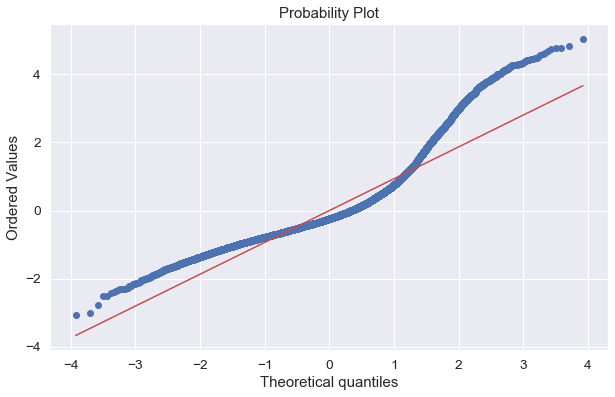

In [42]:
plt.figure(figsize=(10,6))
stats.probplot(st_residual,dist='norm',plot=pylab)
plt.show()


In [ ]:
# Test of Normality
# Shapiro Test

# Null Hypothesis      - the data is following the Guassian curve
# Alternate Hypothesis - the data is not following the Guassian curve

In [43]:
from scipy.stats import shapiro

In [44]:
stat = shapiro(st_residual)
stat

(0.8725689053535461, 0.0)

In [45]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Rejecting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Accepting the Null')

The p value is 0.0  < 0.05. So Accepting the Null


In [ ]:
# Multicollinearity
# There should be no multicollinearity in the data. 
# Multicollinearity occurs when the independent variables are too highly correlated with each other.

# Test of Multicollinearity
# Variance Inflation Factor

# VIF Value = 1       : No Correlation
# VIF Value < 5       : Moderate
# VIF Value > 5, < 10 : High
# VIF Value > 10      : Very High   should drop the variable

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
for i in range(0,len(X.columns)):
    print(data1.columns[i] ,'\t', variance_inflation_factor(X.values,i))

hr 	 1.2255094908977895
weather 	 1.1900334225750469
temperature 	 48.25756699474534
feels-like-temperature 	 48.59208083812965
relative-humidity 	 1.5471269602517983
windspeed 	 1.2184987362947137
psi 	 1.0004032070556137
guest-users 	 1.858787453809977
registered-users 	 1.0497332680924893
dayofweek 	 nan
hour 	 1.0988833119646464
month 	 1.0206119674871543


In [48]:
#Test of AutoCorrelation

from  statsmodels.stats.stattools import durbin_watson

In [49]:
stat =durbin_watson(residuals)
stat

0.7963718067407842

In [50]:
if stat != 2:
    print('The p value is',round(stat,4),' != 2. So Rejecting the Null')
else:
    print('The p value is',round(stat,4),' == 2. So Accepting the Null')

The p value is 0.7964  != 2. So Rejecting the Null


In [ ]:
#There is positive correlation in the residuals

In [ ]:
# Heteroscedasticity
# The residuals should be equal across the regression line

# Evaluation Plot
# Scale Location Plot - Used to evaluate Heteroscadaticity

# Test of Heteroscedasticity
# Goldfend Quandt test

#     Null Hypothesis      - the data is homoscedastic(uniform variance)
#     Alternate Hypothesis - the data is heteroscedastic(unequal variance)

In [51]:
stat = het_goldfeldquandt(Y,model.model.exog)
stat

(1.1767343271422603, 2.5002453439458715e-13, 'increasing')

In [52]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Rejecting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Accepting the Null')

The p value is 0.0  < 0.05. So Accepting the Null


In [53]:
# modelling linear regression

# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [54]:
X = data1.drop('registered-users',axis=1)
Y = data1['registered-users']

Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

The test size is taken as 25%

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

In [57]:
#modelling linear regression

from sklearn.linear_model import LinearRegression

In [58]:
LR = LinearRegression()

In [59]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
pred = LR.predict(xtest)

Evaluation Metrics

In [61]:
import sklearn.metrics as metrics

In [62]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.44061995449258895


In [63]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  0.5362744457125931


In [64]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  0.5777805877766661


In [65]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  0.760118798462889


In [ ]:
#Inference:
#By fitting all the features in the model we have got only 42% R squared.

#From the score we can get the inference 
#that only 42 percent of the variation 
#is reduced by including all the features in the model.

Forward Selection
Lets proceed with the forward selection to get which feature is more important for the registered-users prediction.
In each iteration, add more features and find the score till an addition of a new variable does not improve the performance of the model.

Creating a GRID search to find the best single feature

In [67]:
for i in range(len(data1.columns)-1):
    X=  data1[[data1.columns[i]]]
    Y=  data1[['registered-users']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data1.columns[i],': ',round(metrics.r2_score(ytest,pred),4))

hr :  0.1817
weather :  0.005
temperature :  0.0889
feels-like-temperature :  0.09
relative-humidity :  0.0694
windspeed :  0.002
psi :  -0.0025
guest-users :  0.3345
registered-users :  1.0
dayofweek :  0.0111
hour :  -0.0025
month :  0.0119


In [68]:
for i in range(len(data1.columns)-1):
    X=  data1[['hr','weather','temperature','feels-like-temperature','relative-humidity','windspeed','guest-users','dayofweek','month',data1.columns[i]]]
    Y=  data1[['registered-users']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data1.columns[i],round(metrics.r2_score(ytest,pred),4))

hr 0.422
weather 0.4221
temperature 0.4221
feels-like-temperature 0.4222
relative-humidity 0.4216
windspeed 0.422
psi 0.422
guest-users 0.4222
registered-users 1.0
dayofweek 0.4222
hour 0.4222
month 0.4222


In [69]:
for i in range(len(data1.columns)-1):
    X=  data1[['hr','weather','temperature','feels-like-temperature','relative-humidity','windspeed','guest-users','dayofweek','month','psi','hour',data1.columns[i]]]
    Y=  data1[['registered-users']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data1.columns[i],round(metrics.r2_score(ytest,pred),4))

hr 0.4217
weather 0.422
temperature 0.4219
feels-like-temperature 0.422
relative-humidity 0.422
windspeed 0.422
psi 0.4221
guest-users 0.4217
registered-users 1.0
dayofweek 0.422
hour 0.422
month 0.4219


In [70]:
import matplotlib.pyplot as plt

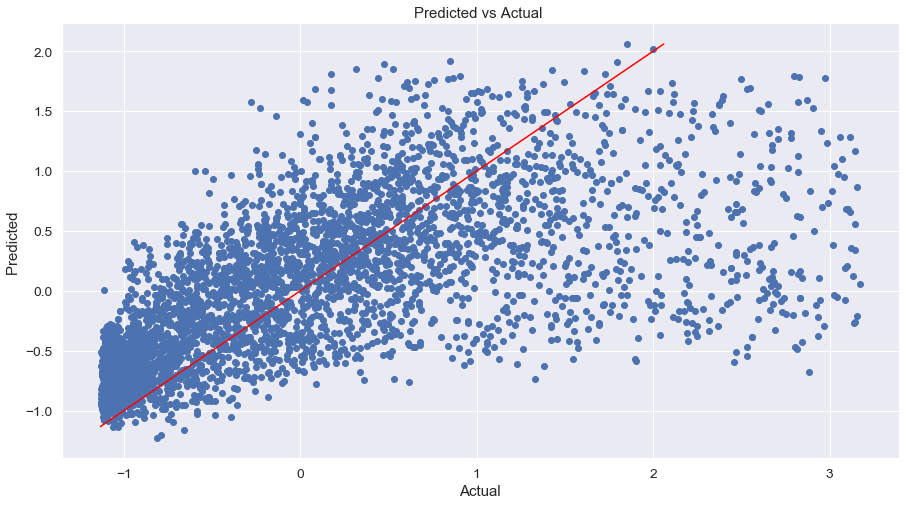

In [71]:
plt.figure(figsize=(15,8))
plt.scatter (ytest, pred) 
range = [ytest.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Predicted vs Actual ')
plt.xlabel ('Actual') 
plt.ylabel ('Predicted ') 
plt.show ()

It can be seen that the straight line is able to capture most of the patterns in the data. 

This is an example of under-fitting.

To overcome under-fitting, 
there is a need to increase the complexity of the model. 

To generate a higher order equation, can add powers of the original features as new features.

the curve is quadratic in nature.

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
pf = PolynomialFeatures(degree=2)

In [74]:
data1 = data.copy()

In [75]:
X = data1.drop('registered-users',axis=1)
Y= data1['registered-users']

Transforming the data

In [76]:
X = pf.fit_transform(X)

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

In [78]:
LR = LinearRegression()

In [79]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
pred = LR.predict(xtest)

In [81]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.555456837158831


In [82]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  660.2598912539228


In [83]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  852478.0278871674


In [84]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  923.297366988105


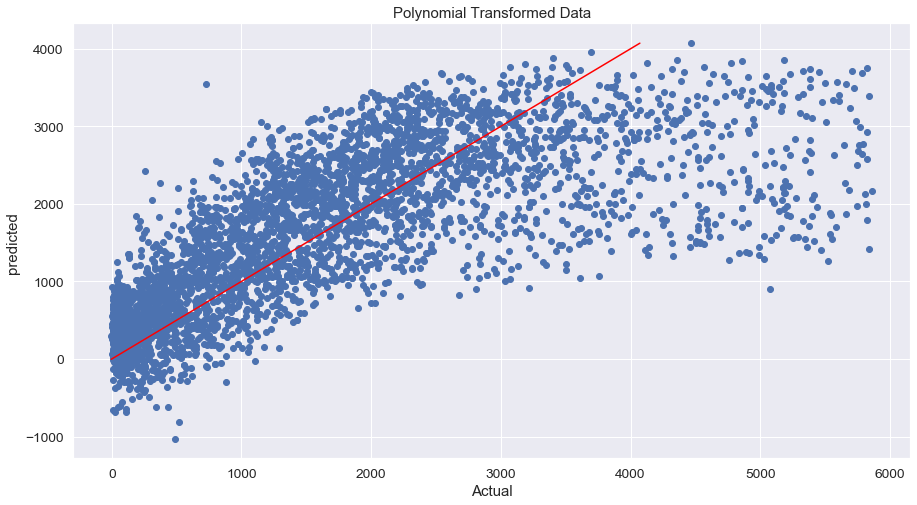

In [85]:
plt.figure(figsize=(15,8))
plt.scatter (ytest, pred) 
range = [ytest.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Polynomial Transformed Data')
plt.xlabel ('Actual') 
plt.ylabel ('predicted ') 
plt.show ()

In [ ]:
It can be seen that still the line is not a best fit but it is better than the original data. 
Transformed data has given a better performance than the original one.